In [9]:
from utils import *
from net1d import *
from torch import nn
from tqdm import tqdm
import numpy as np
from torchsummary.torchsummary import summary

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve

In [2]:
train_dataset=taixin_resampled_data(ratio=[8,1,1],mode='train')
train_iter=DataLoader(train_dataset,batch_size=32,shuffle=True)

In [3]:
conti_net=torch.load('/data/0shared/linzenghui/tai_resampled_model_003.pth')
lossfun=nn.BCELoss()
updater=torch.optim.Adam(conti_net.parameters(),lr=1e-3)

In [4]:
train_loss=[]
for epoch in range(50):
    conti_net.train()
    epochloss=[]
    for train_x,train_y in tqdm(train_iter,desc='training',leave=True):
        train_x=torch.tensor(np.expand_dims(train_x,1)).to('cuda',torch.float32)
        train_y=torch.tensor(np.expand_dims(np.array(train_y<=3),1)).to('cuda',torch.float32)
        y_hat=torch.sigmoid(conti_net(train_x))
        loss=lossfun(y_hat,train_y)
        epochloss.append(loss)
        updater.zero_grad()
        loss.backward()
        updater.step()
    ls=sum(epochloss)/len(epochloss)
    print(f"epoch{epoch},loss:{ls}")
    train_loss.append(ls)

training: 100%|██████████| 263/263 [00:24<00:00, 10.91it/s]


epoch0,loss:0.004755753558129072


training: 100%|██████████| 263/263 [00:21<00:00, 12.10it/s]


epoch1,loss:0.006216877605766058


training: 100%|██████████| 263/263 [00:21<00:00, 11.99it/s]


epoch2,loss:0.0030496723484247923


training: 100%|██████████| 263/263 [00:21<00:00, 12.05it/s]


epoch3,loss:0.004960556514561176


training: 100%|██████████| 263/263 [00:21<00:00, 12.02it/s]


epoch4,loss:0.010791683569550514


training: 100%|██████████| 263/263 [00:22<00:00, 11.76it/s]


epoch5,loss:0.004805885720998049


training: 100%|██████████| 263/263 [00:21<00:00, 12.14it/s]


epoch6,loss:0.0019486149540171027


training: 100%|██████████| 263/263 [00:22<00:00, 11.82it/s]


epoch7,loss:0.0002474278735462576


training: 100%|██████████| 263/263 [00:22<00:00, 11.90it/s]


epoch8,loss:4.559005537885241e-05


training: 100%|██████████| 263/263 [00:22<00:00, 11.95it/s]


epoch9,loss:0.00016083537775557488


training: 100%|██████████| 263/263 [00:21<00:00, 12.06it/s]


epoch10,loss:0.019077472388744354


training: 100%|██████████| 263/263 [00:21<00:00, 12.14it/s]


epoch11,loss:0.013684765435755253


training: 100%|██████████| 263/263 [00:21<00:00, 12.03it/s]


epoch12,loss:0.006501597817987204


training: 100%|██████████| 263/263 [00:21<00:00, 12.16it/s]


epoch13,loss:0.008018972352147102


training: 100%|██████████| 263/263 [00:21<00:00, 12.23it/s]


epoch14,loss:0.00024463090812787414


training: 100%|██████████| 263/263 [00:22<00:00, 11.78it/s]


epoch15,loss:0.0030446285381913185


training: 100%|██████████| 263/263 [00:22<00:00, 11.76it/s]


epoch16,loss:0.0012361599365249276


training: 100%|██████████| 263/263 [00:21<00:00, 12.07it/s]


epoch17,loss:0.02355729229748249


training: 100%|██████████| 263/263 [00:22<00:00, 11.82it/s]


epoch18,loss:0.003158381674438715


training: 100%|██████████| 263/263 [00:22<00:00, 11.89it/s]


epoch19,loss:0.001885990728624165


training: 100%|██████████| 263/263 [00:21<00:00, 12.23it/s]


epoch20,loss:0.008001884445548058


training: 100%|██████████| 263/263 [00:21<00:00, 12.14it/s]


epoch21,loss:0.0031192805618047714


training: 100%|██████████| 263/263 [00:21<00:00, 12.09it/s]


epoch22,loss:0.014490741305053234


training: 100%|██████████| 263/263 [00:21<00:00, 12.26it/s]


epoch23,loss:0.0023157629184424877


training: 100%|██████████| 263/263 [00:21<00:00, 12.06it/s]


epoch24,loss:0.00571437506005168


training: 100%|██████████| 263/263 [00:21<00:00, 12.18it/s]


epoch25,loss:0.0019687628373503685


training: 100%|██████████| 263/263 [00:21<00:00, 12.01it/s]


epoch26,loss:0.0008482182747684419


training: 100%|██████████| 263/263 [00:21<00:00, 12.26it/s]


epoch27,loss:0.00020102901908103377


training: 100%|██████████| 263/263 [00:21<00:00, 11.97it/s]


epoch28,loss:0.00047852625721134245


training: 100%|██████████| 263/263 [00:21<00:00, 12.14it/s]


epoch29,loss:0.005629011429846287


training: 100%|██████████| 263/263 [00:21<00:00, 12.17it/s]


epoch30,loss:0.01920681819319725


training: 100%|██████████| 263/263 [00:22<00:00, 11.83it/s]


epoch31,loss:0.007848480716347694


training: 100%|██████████| 263/263 [00:22<00:00, 11.92it/s]


epoch32,loss:0.001860639313235879


training: 100%|██████████| 263/263 [00:21<00:00, 12.08it/s]


epoch33,loss:0.0032788210082799196


training: 100%|██████████| 263/263 [00:21<00:00, 12.07it/s]


epoch34,loss:0.0005035944050177932


training: 100%|██████████| 263/263 [00:21<00:00, 12.18it/s]


epoch35,loss:0.00029173740767873824


training: 100%|██████████| 263/263 [00:21<00:00, 12.17it/s]


epoch36,loss:0.007445832248777151


training: 100%|██████████| 263/263 [00:21<00:00, 12.25it/s]


epoch37,loss:0.013153367675840855


training: 100%|██████████| 263/263 [00:21<00:00, 12.10it/s]


epoch38,loss:0.0056160567328333855


training: 100%|██████████| 263/263 [00:21<00:00, 12.23it/s]


epoch39,loss:0.001600389601662755


training: 100%|██████████| 263/263 [00:22<00:00, 11.86it/s]


epoch40,loss:0.0013488981639966369


training: 100%|██████████| 263/263 [00:21<00:00, 12.09it/s]


epoch41,loss:0.0024222545325756073


training: 100%|██████████| 263/263 [00:22<00:00, 11.93it/s]


epoch42,loss:0.01110258512198925


training: 100%|██████████| 263/263 [00:22<00:00, 11.77it/s]


epoch43,loss:0.026331810280680656


training: 100%|██████████| 263/263 [00:21<00:00, 12.08it/s]


epoch44,loss:0.01216681208461523


training: 100%|██████████| 263/263 [00:21<00:00, 12.09it/s]


epoch45,loss:0.0005674175918102264


training: 100%|██████████| 263/263 [00:22<00:00, 11.77it/s]


epoch46,loss:0.004290190991014242


training: 100%|██████████| 263/263 [00:22<00:00, 11.85it/s]


epoch47,loss:0.0013346606865525246


training: 100%|██████████| 263/263 [00:21<00:00, 12.16it/s]


epoch48,loss:0.000988165382295847


training: 100%|██████████| 263/263 [00:21<00:00, 11.97it/s]

epoch49,loss:0.00011555955279618502


In [5]:
torch.save(conti_net,r'/data/0shared/linzenghui/tai_resampled_model_002.pth')

In [6]:
val_dataset=taixin_resampled_data([8,1,1],mode='val')
val_iter=DataLoader(val_dataset,batch_size=32,shuffle=False)
pro=torch.tensor([]).to('cuda')
true_y=torch.tensor([])
conti_net.eval()##好好好好好好
with torch.no_grad():
    for val_x,val_y in val_iter:
        val_x=torch.tensor(np.expand_dims(val_x,1)).to('cuda',torch.float32)
        # val_y=val_y.add(-1).to('cuda').long()
        y_hat=torch.sigmoid(conti_net(val_x))
        pro=torch.cat((pro,y_hat))
        true_y=torch.cat((true_y,val_y))

In [7]:
true_y=torch.tensor(np.expand_dims(np.array((true_y<=3)),1)).to(torch.float32)
pre_y=pro.to('cpu')

In [10]:
threshold=0.5
hay_y=(pre_y>=0.5).long()
confusion_matrix(true_y,hay_y)

array([[736,  18],
       [193, 104]])

In [11]:
roc_auc_score(true_y,pre_y)

0.6980726808313016

Text(0.5, 1.0, 'resample_2_ROC')

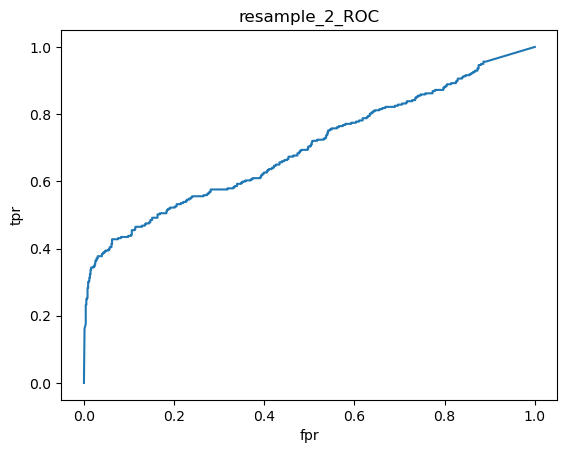

In [12]:
fpr,tpr,threshold=roc_curve(true_y,pre_y)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('resample_2_ROC')